In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np

In [2]:
# import necessary data
core = "data_synth//"

cce4_amf = pd.read_csv(core+'CCE_4_result_AMF.csv', index_col=0)
ise2_amf = pd.read_csv(core+'ISE_2_result_AMF.csv', index_col=0)

cce_rt = pd.read_csv(core+'CCE_AMF_rt.csv', index_col=0)
cce_50 = pd.read_csv(core+'CCE_AMF_50.csv', index_col=0)
cce_ST = pd.read_csv(core+'CCE_AMF_ST.csv', index_col=0)

ise_rt = pd.read_csv(core+'ISE_AMF_rt.csv', index_col=0)
ise_50 = pd.read_csv(core+'ISE_AMF_50.csv', index_col=0)
ise_ST = pd.read_csv(core+'ISE_AMF_ST.csv', index_col=0)

## CCE

In [3]:
def CCE_conc_M(path):
    # import data
    df = pd.read_csv(path, index_col=0)
    
    # format DataFrame
    df.index.name = None
    df.columns = ['Co3O(OH)','Co3O','Co4O4','Ce','Dy','Yb','OA','SA','TMTACN','MeOH']
    df = df.drop(['prime1','prime2'], axis=0)
    df = df.reset_index()
    df = df.drop('index', axis=1)

    # define data-of-interest / constants
    Co_values = df[df.columns[0:3]].values
    conc = 0.012
    conc_values = []

    # calculate [M]
    for i in Co_values:
        conc_c1 = conc * (i[0]/1000)
        conc_c2 = conc * (i[1]/1000)
        conc_c3 = conc * (i[2]/1000)
        ii = ((3 * (conc_c1 + conc_c2)) + (4 * conc_c3))*1000
        conc_values.append(round(ii,5))

    # append [M] to DataFrame and remove values=0
    df['[M]'] = conc_values
    df = copy.deepcopy(df)
    df.replace(0.00, np.nan, inplace=True)

    return df

In [4]:
# import legible data for each iteration
cce1 = CCE_conc_M(core+'CCE_1_legible.csv')
cce2 = CCE_conc_M(core+'CCE_2_legible.csv')
cce3 = CCE_conc_M(core+'CCE_3_legible.csv')
cce4 = CCE_conc_M(core+'CCE_4_legible.csv')

# combine legible data into single DataFrame
cce = cce1.append(cce2, ignore_index=True)
cce = cce.append(cce3, ignore_index=True)
cce = cce.append(cce4, ignore_index=True)

# add additional data as new columns
cce['AMF_rt'] = cce_rt['CCE4_Score']
cce['AMF_50'] = cce_50['CCE4_Score']
cce['AMF_ST'] = cce_ST['CCE4_Score']
cce['AMF_TOT'] = cce4_amf['AMF']

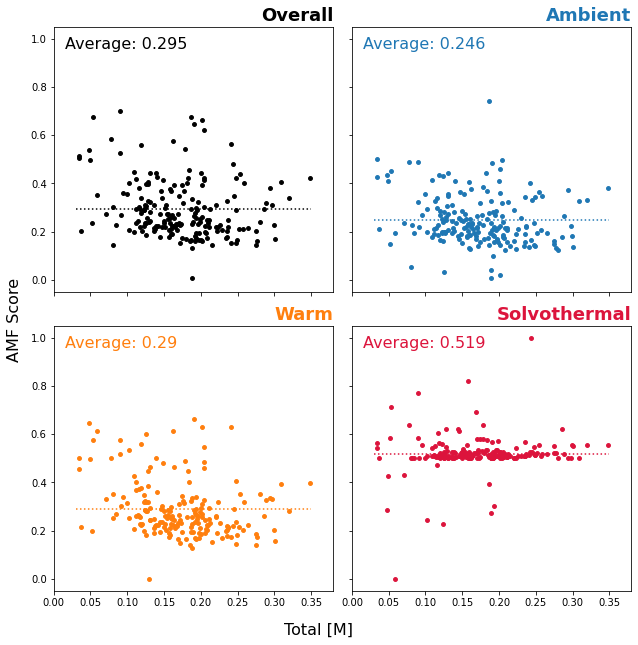

In [5]:
fig, ax = plt.subplots(2,2, figsize=(9,9), sharey=True, sharex=True)


fig.supylabel('AMF Score', fontsize=16)#, fontweight='bold')
fig.supxlabel('Total [M]', fontsize=16)#, fontweight='bold')


ax[0,0].set_ylim(-0.05,1.05)
ax[1,1].set_ylim(-0.05,1.05)

ax[0,0].set_xlim(0.0,0.38)
ax[1,1].set_xlim(0.0,0.38)


ax[0,0].set_title('Overall', loc='right', c='k', fontsize=18, fontweight='bold')
ax[0,0].scatter(cce['[M]'], cce['AMF_TOT'], s=15, c='k')
av = np.mean(cce['AMF_TOT'])
ax[0,0].plot([0.03,0.35], [av,av], c='k', linestyle=':')#, lineweight=1.5)
string = 'Average: ' + str(round(av,3))
ax[0,0].annotate(string, xy=(0.015,0.96), fontsize=16, color='k')


ax[0,1].set_title('Ambient', loc='right', c='tab:blue', fontsize=18, fontweight='bold')
ax[0,1].scatter(cce['[M]'],cce['AMF_rt'], s=15, c='tab:blue')
av = np.mean(cce['AMF_rt'])
ax[0,1].plot([0.03,0.35], [av,av], c='tab:blue', linestyle=':')#, lineweight=1.5)
string = 'Average: ' + str(round(av,3))
ax[0,1].annotate(string, xy=(0.015,0.96), fontsize=16, color='tab:blue')


ax[1,0].set_title('Warm', loc='right', c='tab:orange', fontsize=18, fontweight='bold')
ax[1,0].scatter(cce['[M]'],cce['AMF_50'], s=15, c='tab:orange')
av = np.mean(cce['AMF_50'])
ax[1,0].plot([0.03,0.35], [av,av], c='tab:orange', linestyle=':')#, lineweight=1.5)
string = 'Average: ' + str(round(av,3))
ax[1,0].annotate(string, xy=(0.015,0.96), fontsize=16, color='tab:orange')


ax[1,1].set_title('Solvothermal', loc='right', c='crimson', fontsize=18, fontweight='bold')
ax[1,1].scatter(cce['[M]'],cce['AMF_ST'], s=15, c='crimson')
av = np.mean(cce['AMF_ST'])
ax[1,1].plot([0.03,0.35], [av,av], c='crimson', linestyle=':')#, lineweight=1.5)
string = 'Average: ' + str(round(av,3))
ax[1,1].annotate(string, xy=(0.015,0.96), fontsize=16, color='crimson')


fig.tight_layout()

fig.savefig('output_vis//vis-cbx-si-Co-conc-CCE.png')

## ISE

In [6]:
def ISE_conc_M(path):
    # import data
    df = pd.read_csv(path, index_col=0)
    
    # format DataFrame
    df.index.name = None
    df.columns = ['Cr','Fe','Mn','Co','Ce','Dy','Yb','OA','SA','TMTACN','MeOH']
    df = df.drop(['prime1','prime2'], axis=0)
    df = df.reset_index()
    df = df.drop('index', axis=1)

    # define data-of-interest / constants
    M_values = df[df.columns[0:4]].values
    conc = 0.012
    conc_values = []

    # calculate [M]
    for i in M_values:
        conc_c1 = conc * (i[0]/1000)
        conc_c2 = conc * (i[1]/1000)
        conc_c3 = conc * (i[2]/1000)
        conc_c4 = conc * (i[3]/1000)
        ii = (3 * (conc_c1 + conc_c2 + conc_c3 + conc_c4))*1000
        conc_values.append(round(ii,5))

    # append [M] to DataFrame and remove values=0
    df['[M]'] = conc_values
    df = copy.deepcopy(df)
    df.replace(0.00, np.nan, inplace=True)

    return df

In [7]:
# import legible data for each iteration
ise1 = ISE_conc_M(core+'ISE_1_legible.csv')
ise2 = ISE_conc_M(core+'ISE_2_legible.csv')

# combine legible data into single DataFrame
ise = ise1.append(ise2, ignore_index=True)

# add additional data as new columns
ise['AMF_rt'] = ise_rt['ISE2_Score']
ise['AMF_50'] = ise_50['ISE2_Score']
ise['AMF_ST'] = ise_ST['ISE2_Score']
ise['AMF_TOT'] = ise2_amf['AMF']

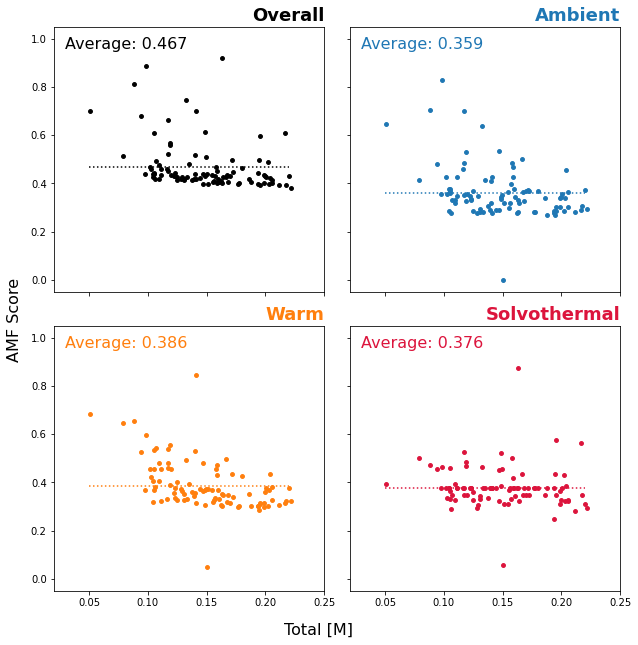

In [8]:
fig, ax = plt.subplots(2,2, figsize=(9,9), sharey=True, sharex=True)


fig.supylabel('AMF Score', fontsize=16)#, fontweight='bold')
fig.supxlabel('Total [M]', fontsize=16)#, fontweight='bold')


ax[0,0].set_ylim(-0.05,1.05)
ax[1,1].set_ylim(-0.05,1.05)

ax[0,0].set_xlim(0.02,0.25)
ax[1,1].set_xlim(0.02,0.25)


ax[0,0].set_title('Overall', loc='right', c='k', fontsize=18, fontweight='bold')
ax[0,0].scatter(ise['[M]'], ise['AMF_TOT'], s=15, c='k')
av = np.mean(ise['AMF_TOT'])
ax[0,0].plot([0.05,0.22], [av,av], c='k', linestyle=':')#, lineweight=1.5)
string = 'Average: ' + str(round(av,3))
ax[0,0].annotate(string, xy=(0.03,0.96), fontsize=16, color='k')


ax[0,1].set_title('Ambient', loc='right', c='tab:blue', fontsize=18, fontweight='bold')
ax[0,1].scatter(ise['[M]'],ise['AMF_rt'], s=15, c='tab:blue')
av = np.mean(ise['AMF_rt'])
ax[0,1].plot([0.05,0.22], [av,av], c='tab:blue', linestyle=':')#, lineweight=1.5)
string = 'Average: ' + str(round(av,3))
ax[0,1].annotate(string, xy=(0.03,0.96), fontsize=16, color='tab:blue')


ax[1,0].set_title('Warm', loc='right', c='tab:orange', fontsize=18, fontweight='bold')
ax[1,0].scatter(ise['[M]'],ise['AMF_50'], s=15, c='tab:orange')
av = np.mean(ise['AMF_50'])
ax[1,0].plot([0.05,0.22], [av,av], c='tab:orange', linestyle=':')#, lineweight=1.5)
string = 'Average: ' + str(round(av,3))
ax[1,0].annotate(string, xy=(0.03,0.96), fontsize=16, color='tab:orange')


ax[1,1].set_title('Solvothermal', loc='right', c='crimson', fontsize=18, fontweight='bold')
ax[1,1].scatter(ise['[M]'],ise['AMF_ST'], s=15, c='crimson')
av = np.mean(ise['AMF_ST'])
ax[1,1].plot([0.05,0.22], [av,av], c='crimson', linestyle=':')#, lineweight=1.5)
string = 'Average: ' + str(round(av,3))
ax[1,1].annotate(string, xy=(0.03,0.96), fontsize=16, color='crimson')


fig.tight_layout()

fig.savefig('output_vis//vis-cbx-si-Co-conc-ISE.png')